In [1]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import os
import io
import base64
import pydicom
import numpy as np
from PIL import Image
import cv2


# 사전 작업
- 원하는 dcm파일로 filename변경할 것 (경로 포함)
- filenameDetail : 경로 없이 만들어줄 이름.
- windowCenter의 범위를 가져와 convert_file함수로 image를 생성한다.


In [4]:
filename = "./Data/MR.1.2.410.200013.1.510.1.20230207180204298.93738.dcm"
filenameDetail = "MR.1.2.410.200013.1.510.1.20230207180204298.93738.dcm"
dcm = pydicom.dcmread(filename)
# print(dcm)
windowCenter = dcm.WindowCenter
windowWidth = dcm.WindowWidth

min_window_center = dcm.WindowCenter - dcm.WindowWidth / 2.0
max_window_center = dcm.WindowCenter + dcm.WindowWidth / 2.0

window_center_range = (min_window_center, max_window_center)
print(window_center_range)

def convert_file(dcm_file_path, x, y ,png_file_path):
    dcm = pydicom.dcmread(dcm_file_path)
    img = dcm.pixel_array.astype(float)
    scaled_image = cv2.convertScaleAbs(img - x, alpha=(255.0 /y))
    # print(scaled_image)
    scaled_image_to_image = Image.fromarray(scaled_image)
    # print(scaled_image_to_image)
    scaled_image_to_image.save(png_file_path,'png')



(-208.0, 2366.0)


# Test for문

In [ ]:
# range에 원하는 img갯수+1
# step에 나누는 숫자를 원하는 img갯수로 나누어준다,
for i in range(151):
    start_value = window_center_range[0]
    print(start_value)
    end_value = window_center_range[1]
    print(end_value)
    step = (end_value - start_value) / 150.0
    print(step)
    window_center = start_value + i * step
    print(f"{i}번째{window_center}")

# 폴더 만들고 convert_file 하기
- default image를 생성하고 range동안 img추가 생성.
- 늘 폴더 이름도 원하는 이미지 갯수와 맞춰줘야 한다.

In [10]:
os.mkdir(f"./TestPng/9")
# folder_path
folder_path = "./TestPng/9/" # 원하는 img갯수로 이름 맞춰주기 .

#default Image
convert_file(filename, windowCenter, windowWidth, f"{folder_path}/defaultImage.png")


for i in range(10):
    start_value = window_center_range[0]
    # print(start_value)
    end_value = window_center_range[1]
    # print(end_value)
    step = (end_value - start_value) / 9.0 #원하는 img갯수로 나누기 
    # print(step)
    window_center = start_value + i * step
    
    x = window_center
    y = windowWidth
    # ouput_path = os.path.join("./TestPng/", f"{filename}_img_{i}.png")
    convert_file(filename, x, y, f"{folder_path}/{i:03d}img.png")

# image 합치기 함수( 수정필요 x )
def combine_images_in_folder(folder_path):
    files = os.listdir(folder_path)

    files = sorted(files)

    # 한 줄에 10개씩 이미지 배열
    n = len(files)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10

    # 이미지를 표시할 플롯 생성
    fig, axs = plt.subplots(rows, cols, figsize=(15, 3 * rows))

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                img_path = os.path.join(folder_path, files[i * 10 + j])
                img = Image.open(img_path)
                axs[i, j].imshow(img, cmap='gray_r')
                axs[i, j].axis('off')

                # 이미지 파일 이름을 표시
                axs[i, j].set_title(files[i * 10 + j])

    plt.show()


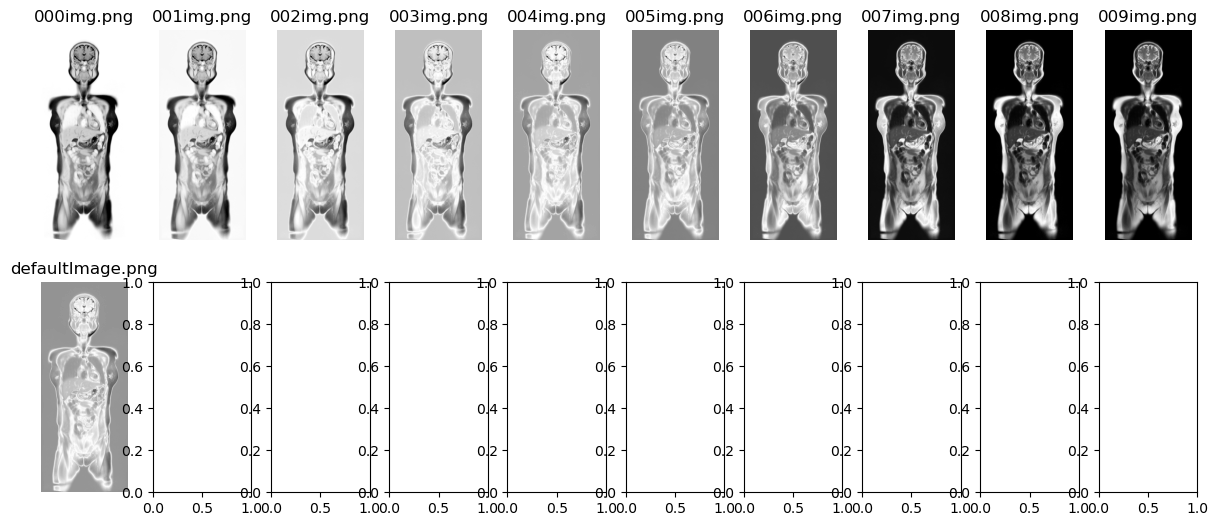

In [11]:
combine_images_in_folder(folder_path)